<a href="https://colab.research.google.com/github/adelriscom/DataScience/blob/main/Data_Management_Extracting_different_file_formats_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### working with different file formats

In [ ]:
## Task 1
# 1) Select the name and corresponding age
# 2) Calculate the Body Mass Index in a seperate column. Hint: Transform your weight to kg and height to meters
# 3) Conduct the following basic statistical overview with pandas:
#    a) the info,
#    b) describe, 
#    c) all missing values 
# 4) Conduct 2 data visualisation exploration of your choice and comment on it
# 5) Use the heading and the information in the FIRST ROW only, make a simple dictionary and write
# to a json object "biostat.json"
    

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn



In [87]:
#Get the data set from the link below
url_link = 'https://elasticbeanstalk-us-east-2-340729127361.s3.us-east-2.amazonaws.com/biostats.csv'
df = pd.read_csv(url_link)
df



,Name,"""Sex""","""Age""","""Height (in)""","""Weight (lbs)"""
0,Alex,"""M""",41,74,170
1,Bert,"""M""",42,68,166
2,Carl,"""M""",32,70,155
3,Dave,"""M""",39,72,167
4,Elly,"""F""",30,66,124
5,Fran,"""F""",33,66,115
6,Gwen,"""F""",26,64,121
7,Hank,"""M""",30,71,158
8,Ivan,"""M""",53,72,175
9,Jake,"""M""",32,69,143


In [94]:

# rename columns to new_columns_name
df = df.rename(columns={'     "Sex"':'Genre', ' "Age"': 'Age', ' "Weight (lbs)"':'Weight (lbs)', ' "Height (in)"':'Height (in)'})


# Print the updated data frame
print(df)

    Name       Genre  Age  Height (in)  Weight (lbs)  Height (mts)  \
0   Alex         "M"   41           74           170          1.88   
1   Bert         "M"   42           68           166          1.73   
2   Carl         "M"   32           70           155          1.78   
3   Dave         "M"   39           72           167          1.83   
4   Elly         "F"   30           66           124          1.68   
5   Fran         "F"   33           66           115          1.68   
6   Gwen         "F"   26           64           121          1.63   
7   Hank         "M"   30           71           158          1.80   
8   Ivan         "M"   53           72           175          1.83   
9   Jake         "M"   32           69           143          1.75   
10  Kate         "F"   47           69           139          1.75   
11  Luke         "M"   34           72           163          1.83   
12  Myra         "F"   23           62            98          1.57   
13  Neil         "M"

In [ ]:
df[' "Height (in)"']

# 1) Select the name and corresponding age

In [95]:
df[['Name','Age']]

,Name,Age
0,Alex,41
1,Bert,42
2,Carl,32
3,Dave,39
4,Elly,30
5,Fran,33
6,Gwen,26
7,Hank,30
8,Ivan,53
9,Jake,32


# 2) Calculate the Body Mass Index in a seperate column.

In [104]:
# define a lambda function to convert inches to meters
inch_to_mtr = lambda x: x * 0.0254

# define a lambda function to convert pounds to kilograms
lbs_to_kg = lambda x: x * 0.45359237

# apply the lambda function to the height column and create a new column for the result
df['Height (mts)'] = df['Height (in)'].apply(inch_to_mtr).round(2)
df['Weight (kg)'] = df['Weight (lbs)'].apply(lbs_to_kg).round(2)

df

,Name,Genre,Age,Height (in),Weight (lbs),Height (mts),Weight (kg),BMI
0,Alex,"""M""",41,74,170,1.88,77.11,21.816999
1,Bert,"""M""",42,68,166,1.73,75.30,25.159544
2,Carl,"""M""",32,70,155,1.78,70.31,22.191011
3,Dave,"""M""",39,72,167,1.83,75.75,22.619368
4,Elly,"""F""",30,66,124,1.68,56.25,19.929847
5,Fran,"""F""",33,66,115,1.68,52.16,18.480726
6,Gwen,"""F""",26,64,121,1.63,54.88,20.655651
7,Hank,"""M""",30,71,158,1.80,71.67,22.120370
8,Ivan,"""M""",53,72,175,1.83,79.38,23.703306
9,Jake,"""M""",32,69,143,1.75,64.86,21.178776


In [105]:
# define BMI variable to calculate BMI index
BMI = df['Weight (kg)']/df['Height (mts)']**2
df['BMI']= BMI
df

,Name,Genre,Age,Height (in),Weight (lbs),Height (mts),Weight (kg),BMI
0,Alex,"""M""",41,74,170,1.88,77.11,21.816999
1,Bert,"""M""",42,68,166,1.73,75.30,25.159544
2,Carl,"""M""",32,70,155,1.78,70.31,22.191011
3,Dave,"""M""",39,72,167,1.83,75.75,22.619368
4,Elly,"""F""",30,66,124,1.68,56.25,19.929847
5,Fran,"""F""",33,66,115,1.68,52.16,18.480726
6,Gwen,"""F""",26,64,121,1.63,54.88,20.655651
7,Hank,"""M""",30,71,158,1.80,71.67,22.120370
8,Ivan,"""M""",53,72,175,1.83,79.38,23.703306
9,Jake,"""M""",32,69,143,1.75,64.86,21.178776


#3) Conduct the following basic statistical overview with pandas:
+   a) the info,
+   b) describe, 
+   c) all missing values 

In [97]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18 non-null     object 
 1   Genre         18 non-null     object 
 2   Age           18 non-null     int64  
 3   Height (in)   18 non-null     int64  
 4   Weight (lbs)  18 non-null     int64  
 5   Height (mts)  18 non-null     float64
 6   Weight (kg)   18 non-null     float64
 7   BMI           18 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.2+ KB


In [98]:
df.describe()

,Age,Height (in),Weight (lbs),Height (mts),Weight (kg),BMI
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,34.666667,69.055556,146.722222,1.753889,66.551667,21.503739
std,7.577055,3.522570,22.540958,0.088990,10.225409,1.856722
min,23.000000,62.000000,98.000000,1.570000,44.450000,18.033186
25%,30.000000,66.250000,132.000000,1.685000,59.872500,20.604729
50%,32.500000,69.500000,150.000000,1.765000,68.040000,21.501925
75%,38.750000,71.750000,165.250000,1.822500,74.960000,22.173351
max,53.000000,75.000000,176.000000,1.900000,79.830000,25.159544


In [99]:
print(df.isnull().sum())


Name            0
Genre           0
Age             0
Height (in)     0
Weight (lbs)    0
Height (mts)    0
Weight (kg)     0
BMI             0
dtype: int64


# 4) Conduct 2 data visualisation exploration of your choice and comment on it


In [100]:
def check_variables(df: pd.DataFrame):
  cols = df.columns
  quantitative_cols = df._get_numeric_data().columns
  categorical_cols = list(set(cols) - set(quantitative_cols))
  return categorical_cols, list(set(quantitative_cols))

cat_cols, quan_cols = check_variables(df)
print(f'categorical columns: {cat_cols}')
print(f'quantitative columns: {quan_cols}')

categorical columns: ['Genre', 'Name']
quantitative columns: ['Height (in)', 'Weight (kg)', 'Height (mts)', 'BMI', 'Age', 'Weight (lbs)']


# Categorical Analysis

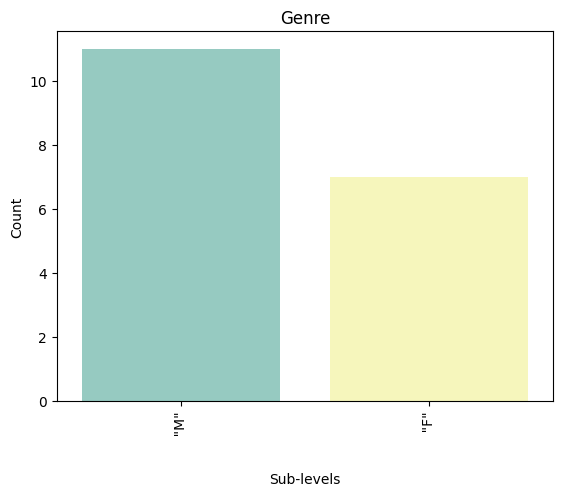

In [101]:
categorical_cols = ['Genre']

for col in categorical_cols:
    sublevels = df[col].value_counts()
    fig, ax = plt.subplots()
    sn.barplot(x=sublevels.index, y=sublevels.values, ax=ax, palette="Set3")
    ax.set_title(f"{col}")
    ax.set_xlabel("Sub-levels")
    ax.set_ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

># This graph indicates that the data set contains more men than women.

# Quantitative Analysis

<Axes: xlabel='Genre', ylabel='Age'>

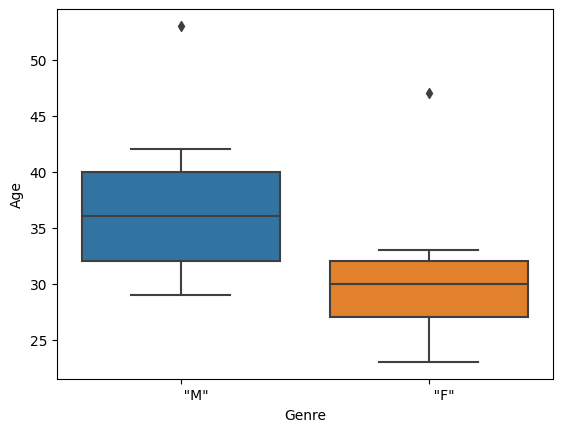

In [102]:
sn.boxplot(x='Genre', y='Age', data=df)


>**Shape:** The shape of a distribution can be hard to determine from the boxplot, but we can compare the variability in the upper half of the data (Max − Median) to the variability in the lower half of the data (Median − Min) to get a sense of shape. For the men, the distribution appears uniform because the lower half of the data has almost the same variability than the upper half. The lower half of the data has a range of 7 years (36 − 29), compared to the upper half of the data with a range of 17 years (53 − 36). The distribution for women appears right-skewed. The lower half of the data has a range of 8 years (31 − 23), compared to a range of 16 years for the upper half of the data (47 − 31). In both cases, the shape suggests that there may be some differences in age between males and females, but further statistical analysis would be needed to determine the significance of these differences.



In [106]:
import json
identity = {
    'Name':'Alex',
    'Genre': '"M"',
    'Age':41,
    'Height (in)': 74,
    'Weight (lbs)':170,
    'Height (mts)':1.88, 
    'Weight (lbs)':77.11,
    'BMI':21.816999
    
}

In [107]:
with open ('identity.json', 'w') as f:   # Writing JSON object
    json.dump(identity, f)

In [110]:
json_object = json.dumps(identity, indent =4)
print(identity)

{'Name': 'Alex', 'Genre': '"M"', 'Age': 41, 'Height (in)': 74, 'Weight (lbs)': 77.11, 'Height (mts)': 1.88, 'BMI': 21.816999}


In [ ]:
## Task 2
# Create a simple file structure with the information below and generate the xml file as shown below
   <book>
      <author>Gambardella, Matthew</author>
      <title>XML Developers Guide</title>
      <genre>Computer</genre>
      <price>22.50</price>
      <publish_date>2022-10-01</publish_date>
      <description>An in-depth look at creating applications 
      with XML.</description>
   </book>

# Solution